In [28]:
import pandas as pd
import pylab as plt
import statsmodels.api as sm

In [49]:
sl = pd.read_csv("https://www.star.nesdis.noaa.gov/socd/lsa/SeaLevelRise/slr/slr_sla_gbl_keep_all_66.csv", header=5, index_col="year")
sl_ns = pd.read_csv("https://www.star.nesdis.noaa.gov/socd/lsa/SeaLevelRise/slr/slr_sla_gbl_free_all_66.csv", header=5, index_col="year")

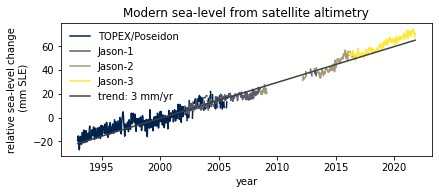

In [50]:
fig = plt.figure(figsize=(6.2, 2.8))
ax = fig.add_subplot(111)
sl_ns.plot(ax=ax, colormap="cividis")
sl_ns["mean"] = sl_ns.mean(axis=1)
X = sl_ns.index
y = sl_ns["mean"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
b, a = model.params
l_trend = ax.plot(sl_ns.index, a * sl_ns.index + b, color="0.25", label=f"trend: {a:.0f} mm/yr")
legend = ax.legend(loc="upper left")
legend.get_frame().set_linewidth(0.0)
legend.get_frame().set_alpha(0.0)
ax.set_ylabel("relative sea-level change\n (mm SLE)")
plt.title("Modern sea-level from satellite altimetry")
fig.tight_layout()
fig.savefig("figures/sea-level-from-altimetry.pdf")

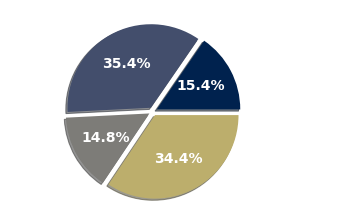

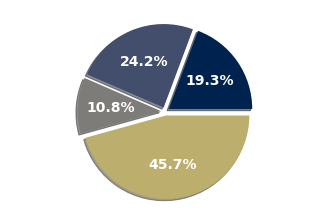

In [119]:
theme = plt.get_cmap("cividis")

data = pd.DataFrame(data=[["Thermal Expansion", 34.4], ["Ice Sheets", 35.4], ["Glaciers", 15.4], ["Storage", 14.8]], columns=["contrib", "%"])
data = data.groupby("contrib")["%"].sum()

pie, ax = plt.subplots(figsize=[5.4, 3.2])
ax.set_prop_cycle("color", [theme(1.0 * i / len(data))
                             for i in range(len(data))])
labels = data.keys()
plt.pie(x=data, autopct="%.1f%%", explode=[0.05]*4, labels=labels, pctdistance=0.6, shadow=True, textprops={"color": "w", "weight": "bold", "size": 14})
plt.tight_layout()
pie.savefig("figures/sea-level-contrib-2006-2018.pdf")

data = pd.DataFrame(data=[["Thermal Expansion", 45.7], ["Ice Sheets", 24.2], ["Glaciers", 19.3], ["Storage", 10.8]], columns=["contrib", "%"])
data = data.groupby("contrib")["%"].sum()

pie, ax = plt.subplots(figsize=[5.4, 3.2])
ax.set_prop_cycle("color", [theme(1.0 * i / len(data))
                             for i in range(len(data))])
labels = data.keys()
plt.pie(x=data, autopct="%.1f%%", explode=[0.05]*4, labels=labels, pctdistance=0.6, shadow=True, textprops={"color": "w", "weight": "bold", "size": 14})
plt.tight_layout()
pie.savefig("figures/sea-level-contrib-1993-2018.pdf")

In [76]:
len(data)

4

In [7]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   mean   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                 3.145e+04
Date:                Tue, 09 Nov 2021   Prob (F-statistic):               0.00
Time:                        12:17:56   Log-Likelihood:                -3812.9
No. Observations:                1292   AIC:                             7630.
Df Residuals:                    1290   BIC:                             7640.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6021.1139     34.083   -176.660      0.0